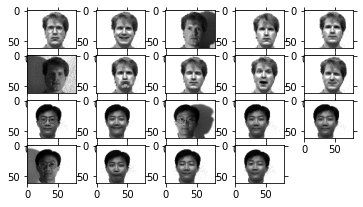

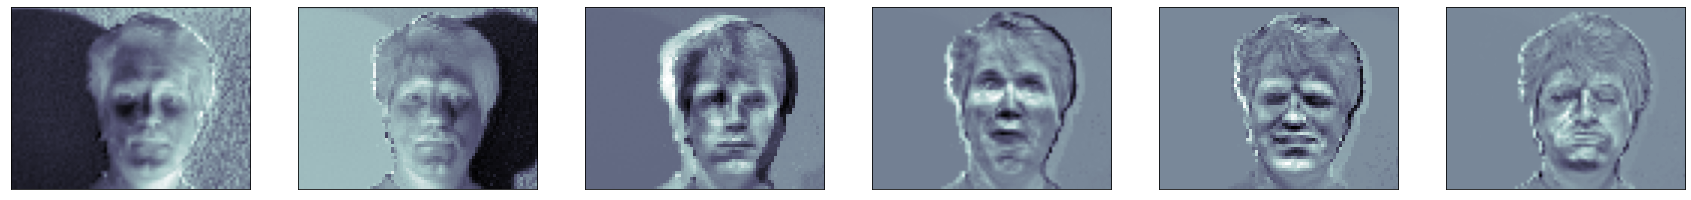

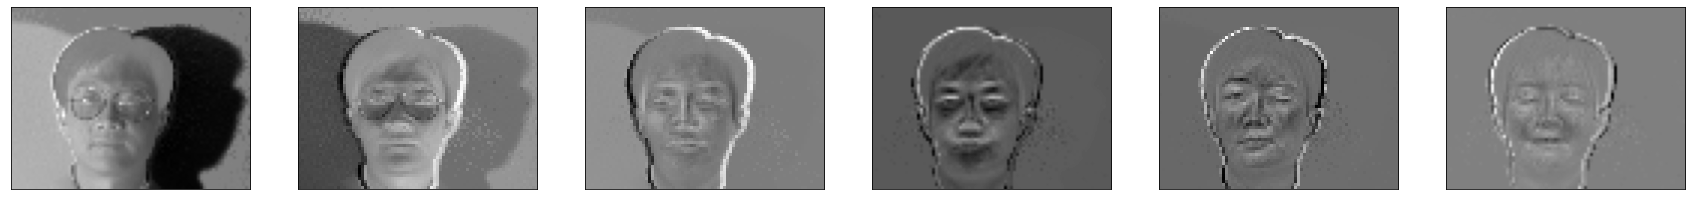

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy import asarray
from PIL import Image
import pandas as pd
from matplotlib.image import imread
import os
from sklearn import decomposition
dataset_path = 'data/yalefaces/'
dataset_dir  = os.listdir(dataset_path)
img = plt.imread(dataset_path + dataset_dir[0])
size=img[::4,::4].shape
len(dataset_dir)
an=[]
testlist=[]
for i in dataset_dir:
    if ('test' not in i):
        an.append(i)
    else: testlist.append(i)
dataset_dir=an
training_tensor  = np.ndarray(shape=(19, size[0]*size[1]), dtype=np.float64)
for i in range(len(dataset_dir)):
    img = plt.imread(dataset_path + dataset_dir[i])
    img = img[::4,::4]
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(5,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()
test_tensor  = np.ndarray(shape=(2, size[0]*size[1]), dtype=np.float64)
for i in range(len(testlist)):
    testimg = plt.imread(dataset_path + testlist[i])
    testimg = testimg[::4,::4]
    test_tensor[i,:] = np.array(testimg, dtype='float64').flatten()
pca1 = decomposition.PCA()
pca1.fit(training_tensor[:10])
pca2 = decomposition.PCA(n_components=6)
pca2.fit(training_tensor[11:19])
fig1 = plt.figure(figsize=(30, 6))
for i in range(6):
    ax = fig1.add_subplot(1,6 , i + 1, xticks=[], yticks=[])
    ax.imshow(pca1.components_[i].reshape(size),
              cmap=plt.cm.bone)
fig2 = plt.figure(figsize=(30, 6))
for i in range(6):
    ax = fig2.add_subplot(1,6 , i + 1, xticks=[], yticks=[])
    ax.imshow(pca2.components_[i].reshape(size),
              cmap='gray')

In [2]:
s11= np.linalg.norm((test_tensor[0]-pca1.mean_)-np.dot(np.dot(np.transpose(pca1.components_[0].reshape(1,4880)),(pca1.components_[0].reshape(1,4880))),test_tensor[0]-pca1.mean_))**2
s12= np.linalg.norm((test_tensor[1]-pca1.mean_)-np.dot(np.dot(np.transpose(pca1.components_[0].reshape(1,4880)),(pca1.components_[0].reshape(1,4880))),test_tensor[1]-pca1.mean_))**2
s21= np.linalg.norm((test_tensor[0]-pca2.mean_)-np.dot(np.dot(np.transpose(pca2.components_[0].reshape(1,4880)),(pca2.components_[0].reshape(1,4880))),test_tensor[0]-pca2.mean_))**2
s22= np.linalg.norm((test_tensor[1]-pca2.mean_)-np.dot(np.dot(np.transpose(pca2.components_[0].reshape(1,4880)),(pca2.components_[0].reshape(1,4880))),test_tensor[1]-pca2.mean_))**2
d = {'S11': [s11],'S12': [s12],'S21': [s21],'S22': [s22]}
df = pd.DataFrame(data=d)
df


,S11,S12,S21,S22
0,7.201612e+06,4.063777e+07,3.360889e+07,4.598788e+06


In [9]:
np.dot(np.dot(np.transpose(pca2.components_[0].reshape(1,4880)),(pca2.components_[0].reshape(1,4880))),test_tensor[1]-pca2.mean_)

array([-1.66205791, -2.03979312, -1.43126196, ...,  0.        ,
        4.27602923,  0.54545721])